In [221]:
# pip install yfinance
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [379]:
# time series t = 300 trading days, daily resolution.


start_sp = datetime.datetime(2022, 12,6)
end_sp = datetime.datetime(2024, 2, 16)
# S&P 500
SPY = yf.download('SPY',start_sp,end_sp)
# Technology Select Sector SPDR Fund
XLK = yf.download('XLK',start_sp,end_sp)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


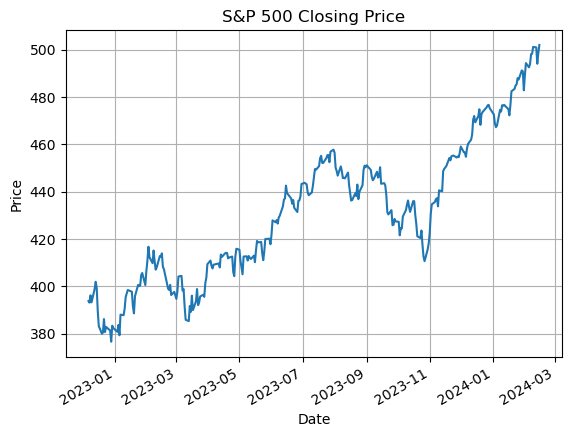

In [318]:
SPY['Close'].plot()
# plt.tight_layout()
plt.title('S&P 500 Closing Price')
plt.ylabel('Price')
plt.grid()
plt.show()


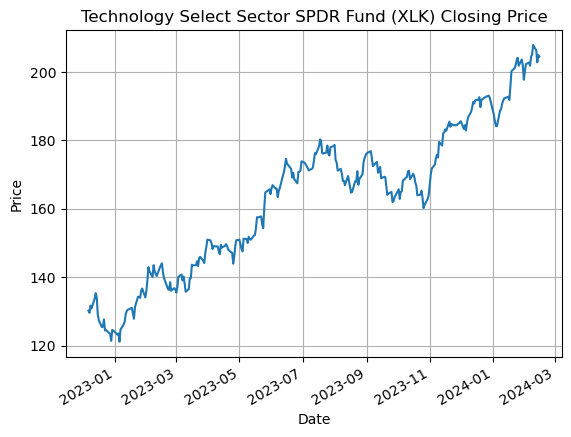

In [319]:
XLK['Close'].plot()
# plt.tight_layout()
plt.title('Technology Select Sector SPDR Fund (XLK) Closing Price')
plt.ylabel('Price')
plt.grid()
plt.show()

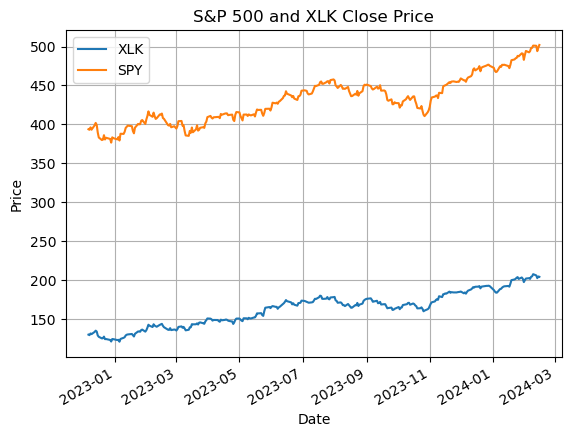

In [288]:
XLK['Close'].plot(label="XLK")
SPY["Close"].plot(label="SPY")
# plt.tight_layout()
plt.title('S&P 500 and XLK Close Price')
plt.legend()
plt.ylabel('Price')
plt.grid()
plt.show()

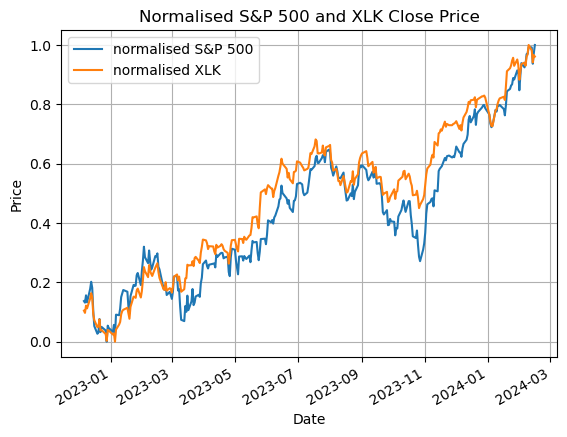

In [292]:
# normalizing
min_spy = np.min(SPY["Close"])
max_spy = np.max(SPY["Close"])
normalized_spy = (SPY["Close"] - min_spy) / (max_spy - min_spy)

min_xlk = np.min(XLK["Close"])
max_xlk = np.max(XLK["Close"])
normalized_xlk = (XLK["Close"] - min_xlk) / (max_xlk - min_xlk)

normalized_spy.plot(label='normalised S&P 500')
normalized_xlk.plot(label='normalised XLK')
plt.title('Normalised S&P 500 and XLK Close Price')
plt.legend()
plt.ylabel('Price')
plt.grid()
plt.show()
    


In [226]:
# Moving average of time series of a an arbitrary time window t 
# is An average of the current value of a time series and its immediate neighbors in the past:
# if we pick 3 neighbours
# Yt=1/3(ε t + ε t − 1 + ε t − 2 )
# εt ∼N(0,σ2)

In [293]:
def move_average(series,t):
    lst =[]
    for i in range(len(series)):
        if i>=t-1:
            num =[series[i-x] for x in range(0,t)]
            avg= np.sum(num)/t
            lst.append(avg)
    return lst

In [294]:
# calculate moving average 
mvg_SPY_5=move_average(SPY['Close'],5)
mvg_SPY_20=move_average(SPY['Close'],20)
mvg_SPY_60=move_average(SPY['Close'],60)

mvg_XLK_5=move_average(XLK['Close'],5)
mvg_XLK_20=move_average(XLK['Close'],20)
mvg_XLK_60=move_average(XLK['Close'],60)

# add date time information for moving average 
for x in range(4):
    mvg_SPY_5.insert(x,np.nan)
    mvg_XLK_5.insert(x,np.nan)
for x in range(19):
    mvg_SPY_20.insert(x,np.nan)
    mvg_XLK_20.insert(x,np.nan)
for x in range(59):
    mvg_SPY_60.insert(x,np.nan)
    mvg_XLK_60.insert(x,np.nan)
    
mvg_SPY_5 = pd.Series(mvg_SPY_5, index=SPY.index)
mvg_SPY_20=pd.Series(mvg_SPY_20, index=SPY.index)
mvg_SPY_60=pd.Series(mvg_SPY_60, index=SPY.index)

mvg_XLK_5=pd.Series(mvg_XLK_5, index=XLK.index)
mvg_XLK_20=pd.Series(mvg_XLK_20, index=XLK.index)
mvg_XLK_60=pd.Series(mvg_XLK_60, index=XLK.index)



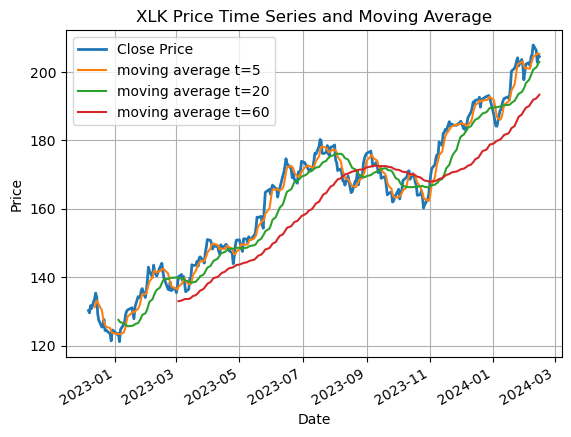

In [295]:
XLK['Close'].plot(label='Close Price', linewidth = '2')
mvg_XLK_5.plot(label='moving average t=5')
mvg_XLK_20.plot(label='moving average t=20')
mvg_XLK_60.plot(label ='moving average t=60')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XLK Price Time Series and Moving Average')
plt.legend()
plt.show()

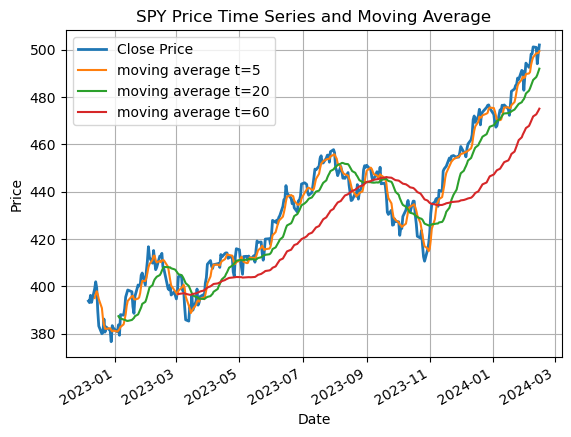

In [296]:
SPY['Close'].plot(label='Close Price',linewidth='2')
mvg_SPY_5.plot(label='moving average t=5')
mvg_SPY_20.plot(label='moving average t=20')
mvg_SPY_60.plot(label ='moving average t=60')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Price Time Series and Moving Average')
plt.legend()
plt.show()

In [298]:
# linear return = ( Pt-Pt-1)/Pt-1
def linear_return(serie):

    return serie['Close'].pct_change().dropna()
    
SPY_linear_return =linear_return(SPY)
XLK_linear_return =linear_return(XLK)


In [299]:
# log return = log(Pt/Pt-1)
def log_return(serie):
     return np.log(1+serie['Close'] .pct_change()).dropna()
     
SPY_log_return =log_return(SPY)

XLK_log_return =log_return(XLK)

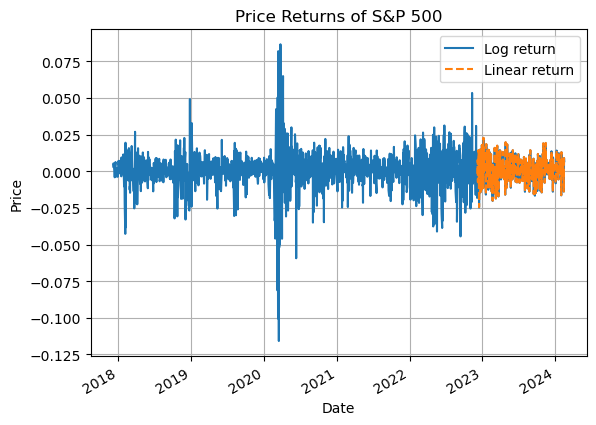

In [382]:
SPY_log_return.plot(label='Log return', linestyle='-')
SPY_linear_return.plot(label='Linear return',linestyle='--')


plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Returns of S&P 500')
plt.legend()
plt.show()


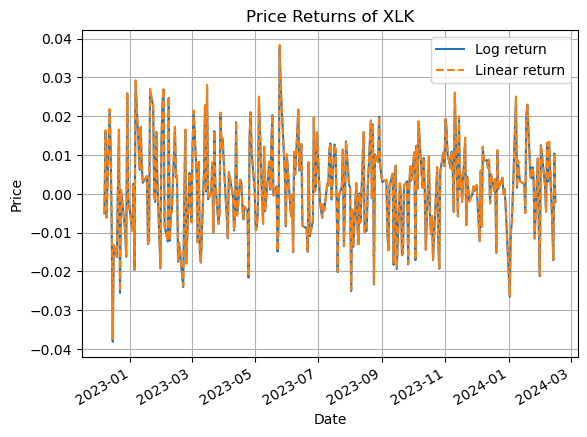

In [381]:
XLK_log_return.plot(label='Log return',linestyle='-')
XLK_linear_return.plot(label='Linear return',linestyle='--')

plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Returns of XLK')
plt.legend()
plt.show()

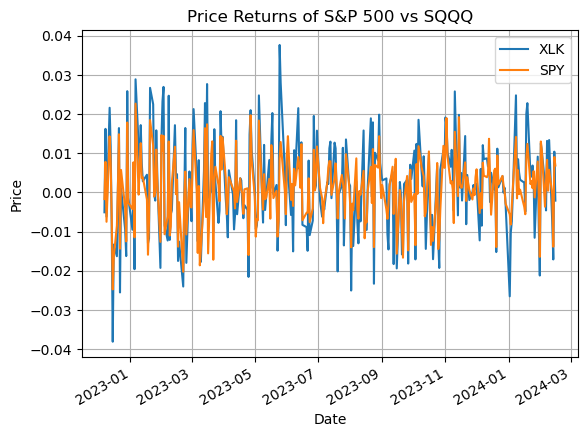

In [316]:
XLK_log_return.plot(label='XLK',linestyle='-')
SPY_log_return.plot(label='SPY',linestyle='-')

plt.grid()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Returns of S&P 500 vs SQQQ')
plt.legend()
plt.show()

In [305]:
# ACF(k)= Cov(Xt,Xt-k)/sqrt(var(Xt)*var(Xt-k))

import statsmodels.api as sm
acf_SPY = sm.tsa.stattools.acf(SPY["Close"],nlags=40)
acf_XLK =sm.tsa.stattools.acf(XLK["Close"],nlags=40)


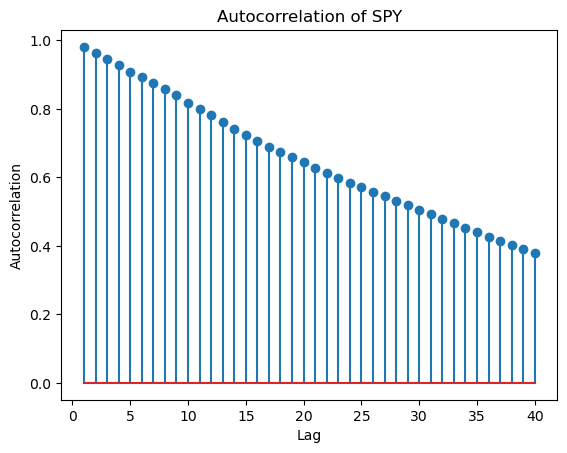

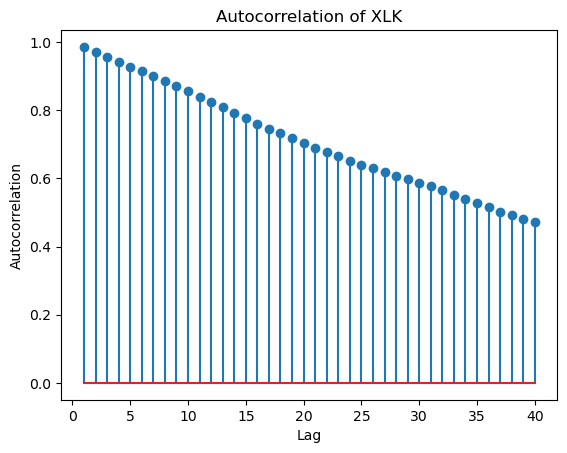

In [343]:
plt.stem(range(1, 40+1), acf_SPY[1:])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of SPY')
plt.show()

plt.stem(range(1, 40+1), acf_XLK[1:])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of XLK')
plt.show()


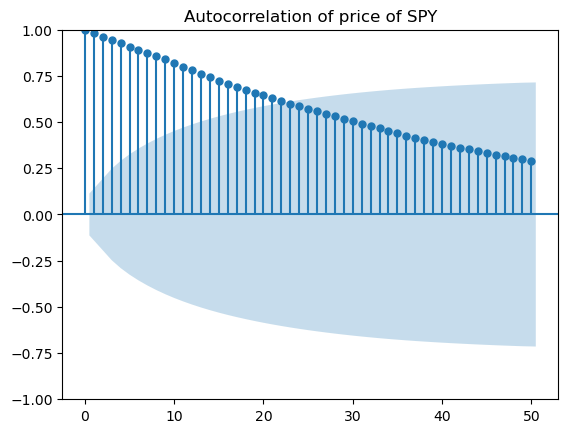

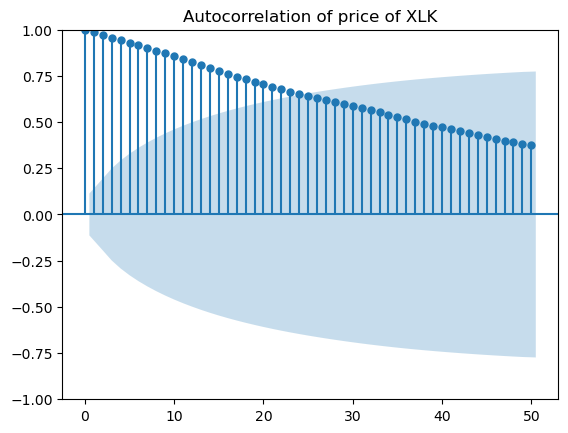

In [344]:

# pacf_XLK = sm.tsa.stattools.pacf(XLK["Close"], nlags=40)
# plt.stem(range(1, 40+1), pacf_XLK[1:])
# plt.xlabel('Lag')
# plt.ylabel('pacf')
# plt.title('Partical Autocorrelation of price of XLK')
# plt.show()

# pacf_SPY = sm.tsa.stattools.pacf(SPY["Close"], nlags=40)
# plt.stem(range(1, 40+1), pacf_SPY[1:])
# plt.xlabel('Lag')
# plt.ylabel('pacf')
# plt.title('Partical Autocorrelation of price of SPY')
# plt.show()

plot_acf(SPY["Close"], lags=50.)
plt.title("Autocorrelation of price of SPY")
pyplot.show()

plot_acf(XLK["Close"], lags=50.)
plt.title("Autocorrelation of price of XLK")
pyplot.show()

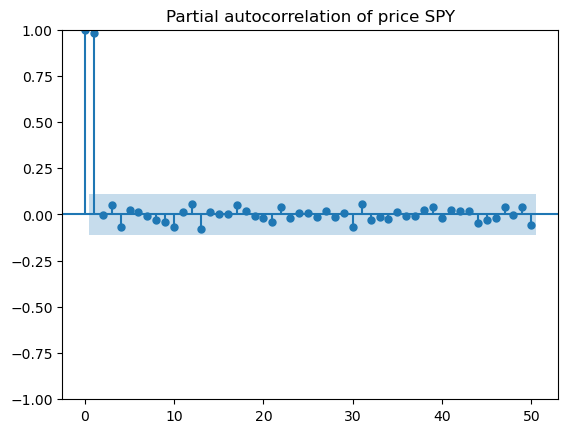

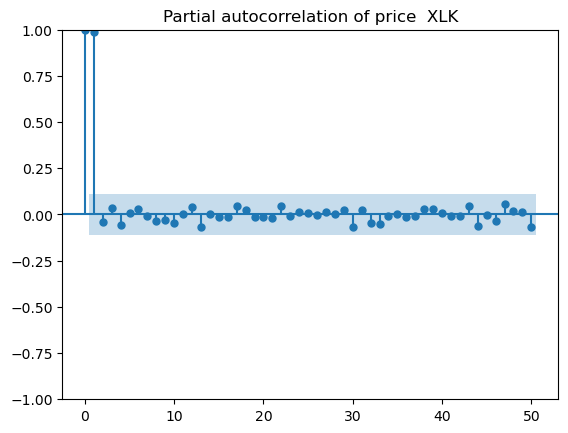

In [352]:
plot_pacf(SPY["Close"], lags=50.)
plt.title("Partial autocorrelation of price SPY")
pyplot.show()

plot_pacf(XLK["Close"], lags=50.)
plt.title("Partial autocorrelation of price  XLK")
pyplot.show()

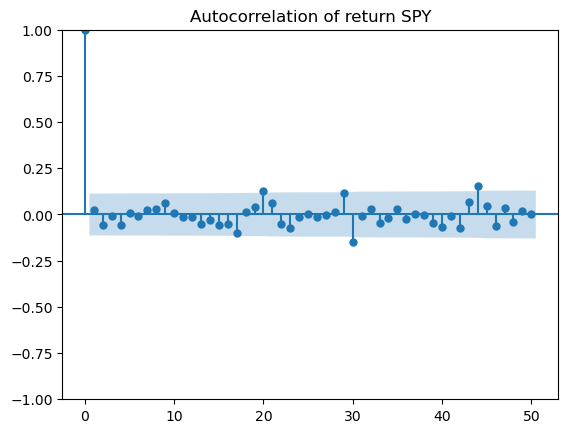

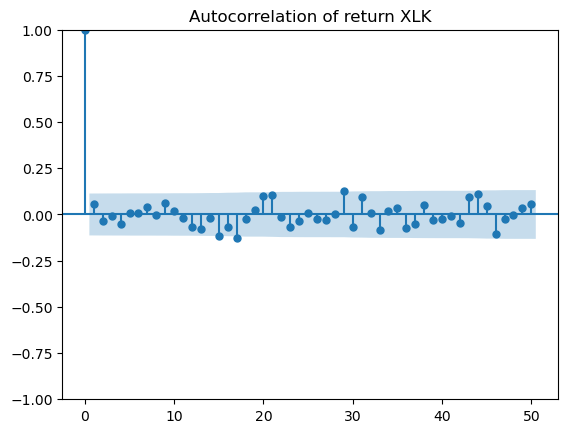

In [349]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(SPY_log_return, lags=50.)
plt.title("Autocorrelation of return SPY")
pyplot.show()

plot_acf(XLK_log_return, lags=50.)
plt.title("Autocorrelation of return XLK")
pyplot.show()

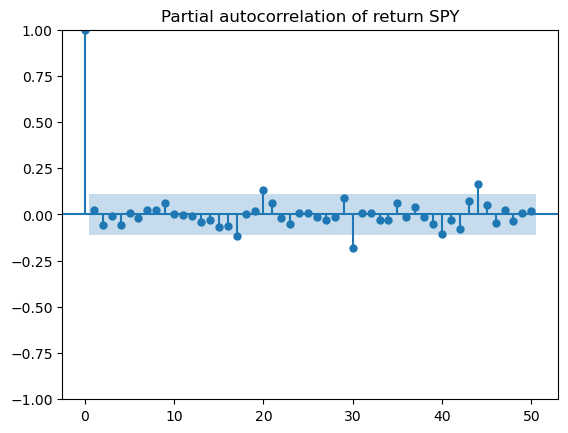

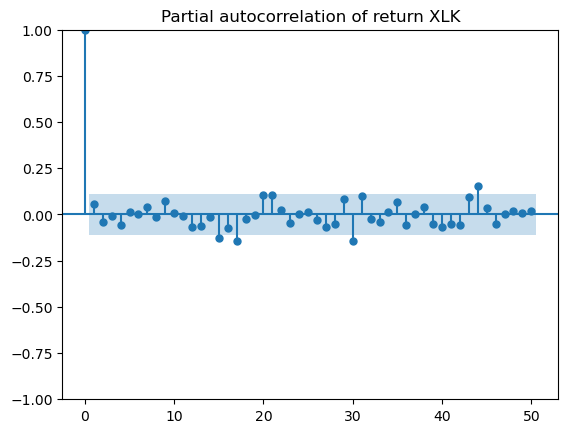

In [350]:
plot_pacf(SPY_log_return, lags=50.)
plt.title("Partial autocorrelation of return SPY")
pyplot.show()

plot_pacf(XLK_log_return, lags=50.)
plt.title("Partial autocorrelation of return XLK")
pyplot.show()

In [347]:
# acf_SPY_return = sm.tsa.stattools.acf(SPY_log_return,nlags=40)
# acf_XLK_return = sm.tsa.stattools.acf(XLK_log_return,nlags=40)

# plt.stem(range(1, 40+1), acf_SPY_return[1:])
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation of return of SPY')
# plt.show()

# plt.stem(range(1, 40+1), acf_XLK_return[1:])
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation of return of XLK')
# plt.show()


In [346]:
# pacf_SPY_return = sm.tsa.stattools.pacf(SPY_log_return, nlags=40)
# plt.stem(range(1, 40+1), pacf_SPY_return[1:])
# plt.xlabel('Lag')
# plt.ylabel('PACF')
# plt.title('Partcial Autocorrelation of return of SPY')
# plt.show()

# pacf_XLK_return = sm.tsa.stattools.pacf(XLK_log_return, nlags=40)
# plt.stem(range(1, 40+1), pacf_XLK_return[1:])
# plt.xlabel('Lag')
# plt.ylabel('PACF')
# plt.title('Partcial Autocorrelation of return of Nvida')
# plt.show()

In [241]:
# Shapiro-Wilk Gaussianity Test
# A statistical test for Gaussianity is the Shapiro-Wilk test which is based on a detailed analysis of a sample order statistics for Gaussian variables. The Shapiro-Wilk test uses both marginal order statistics and also joint order statistics, i.e. the covariance of pairs of different orders, e.g. the covariance between the maximum and the minimum and all the other possible pairs.

[*********************100%%**********************]  1 of 1 completed


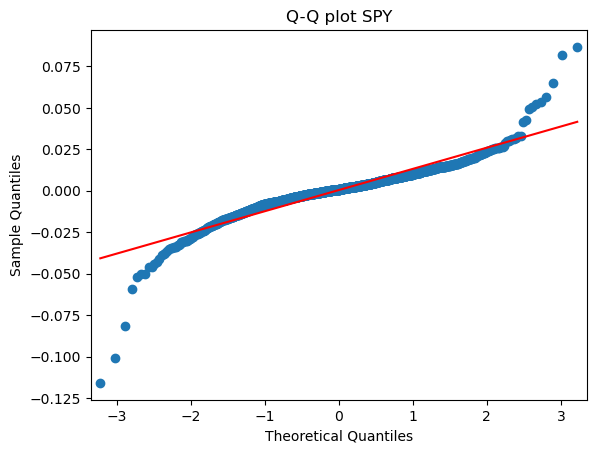

[*********************100%%**********************]  1 of 1 completed


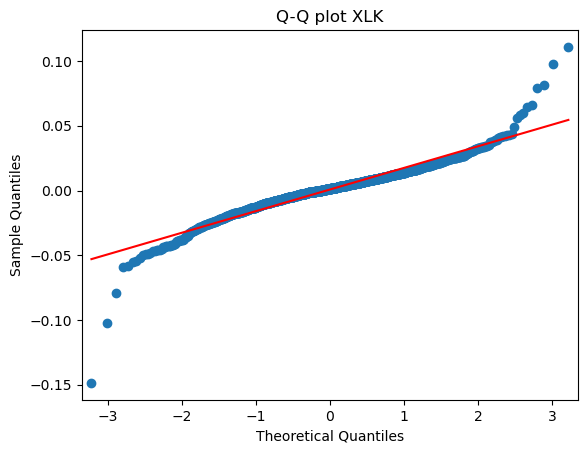

In [388]:
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot

start_sp = datetime.datetime(2017, 12,6)
end_sp = datetime.datetime(2024, 2, 16)
SPY2 = yf.download('SPY',start_sp,end_sp)
SPY2_log_return = log_return(SPY2)
qqplot(SPY2_log_return, line='s')
plt.title("Q-Q plot SPY")
pyplot.show()
seed(2)

start_sp = datetime.datetime(2017, 12,6)
end_sp = datetime.datetime(2024, 2, 16)
XLK2 = yf.download('XLK',start_sp,end_sp)
XLK2_log_return = log_return(XLK2)
qqplot(XLK2_log_return, line='s')
plt.title("Q-Q plot XLK")
pyplot.show()

In [386]:
from scipy.stats import kstest

statistic, p_value_SPY = kstest(SPY_log_return, "norm")

alpha = 0.05
if p_value_SPY < alpha:
    print("Reject the null hypothesis: The SPY sample return does not come from a normal distribution.statistic ={},p value={}".format(statistic,p_value_SPY))
else:
    print("Fail to reject the null hypothesis: The SPY sample return comes from a normal distribution.")


statistic, p_value_SLK = kstest(XLK_log_return, 'norm')
alpha = 0.05
if p_value_SLK < alpha:
    print("Reject the null hypothesis: The XLK sample return does not follow a normal distribution.statistic ={},p value={}".format(statistic,p_value_SLK))
else:
    print("Fail to reject the null hypothesis: The XLK sample return  does not follow a normal distribution.")


Reject the null hypothesis: The SPY sample return does not come from a normal distribution.statistic =0.48040779035804904,p value=0.0
Reject the null hypothesis: The XLK sample return does not follow a normal distribution.statistic =0.4860714561116122,p value=1.3540096913606344e-65


In [390]:
# Stationality test Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

SPY_adfuller = adfuller(SPY_log_return, autolag='AIC')
XLK_adfuller=adfuller(XLK_log_return,autolag='AIC')

# SPY_adfuller = adfuller(SPY["Close"], autolag='AIC')
# XLK_adfuller=adfuller(XLK["Close"],autolag='AIC')


# Extract and print the test statistics and p-value
SPY_static = SPY_adfuller[0]
p_SPY= SPY_adfuller[1]
print(f'ADF Statistic: {SPY_static}')
print(f'p-value: {p_SPY}')
if p_SPY <= 0.05:
    print('Reject the null hypothesis. The log return of SPY  is stationary.')
else:
    print('Fail to reject the null hypothesis. The log return of SPY may not be stationary.')



adf_statistic = XLK_adfuller [0]
p_value = XLK_adfuller [1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print('Reject the null hypothesis. The log return of XLK is stationary.')
else:
    print('Fail to reject the null hypothesis. The log return of XLK  may not be stationary.')



ADF Statistic: -11.989967900571914
p-value: 3.539877446941788e-22
Reject the null hypothesis. The log return of SPY  is stationary.
ADF Statistic: -16.243810136613057
p-value: 3.704381242595666e-29
Reject the null hypothesis. The log return of XLK is stationary.


In [391]:
#  Price time series stationary test
SPY_adfuller = adfuller(SPY["Close"], autolag='AIC')
XLK_adfuller=adfuller(XLK["Close"],autolag='AIC')
SPY_static = SPY_adfuller[0]
p_SPY= SPY_adfuller[1]
print(f'ADF Statistic: {SPY_static}')
print(f'p-value: {p_SPY}')
if p_SPY <= 0.05:
    print('Reject the null hypothesis. The log return of SPY  is stationary.')
else:
    print('Fail to reject the null hypothesis. The log return of SPY may not be stationary.')



adf_statistic = XLK_adfuller [0]
p_value = XLK_adfuller [1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print('Reject the null hypothesis. The log return of XLK is stationary.')
else:
    print('Fail to reject the null hypothesis. The log return of XLK  may not be stationary.')

ADF Statistic: -0.03492592701727253
p-value: 0.955546653451725
Fail to reject the null hypothesis. The log return of SPY may not be stationary.
ADF Statistic: -0.3291756020317047
p-value: 0.9212693454923676
Fail to reject the null hypothesis. The log return of XLK  may not be stationary.


In [315]:
theta,_,_,_,= np.linalg.lstsq(SPY[['Close']], XLK['Close'], rcond=None)
residuals = SPY['Close'] - theta * XLK['Close']
result_residuals = adfuller(residuals)
print(f'Residuals: ADF Statistic = {result_residuals[0]:.4f}, p-value = {result_residuals[1]:.4f}')

# Interpret the results
if result_residuals[1] < 0.05:
    print('Cointegration exists between SPY and XLK.')
else:
    print('No evidence of cointegration between SPY and XLK.')

Residuals: ADF Statistic = -0.0676, p-value = 0.9526
No evidence of cointegration between SPY and XLK.
